In [29]:
from datetime import timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [ ]:
aus_population = (
    pd.read_csv("fpppy_data\data\global_economy.csv")
    .query('`Code` == "AUS"')
    .filter(["ds", "Population"])
    .rename({"Population": "y"}, axis=1)
    .reset_index(drop=True)
)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shivk\AppData\Local\Temp\ipykernel_12816\3322244893.py:1: SyntaxWarning: invalid escape sequence '\d'
  aus_population = pd.read_csv('fpppy_data\data\global_economy.csv').query('`Code` == "AUS"').filter(['ds', 'Population']).rename({'Population': 'y'}, axis=1).reset_index(drop=True)


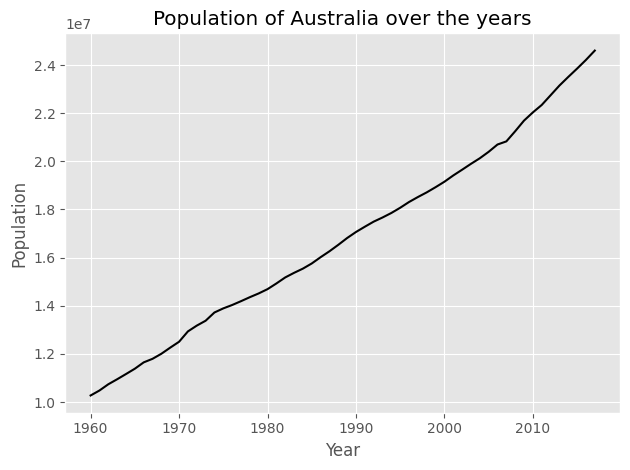

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_population["ds"], aus_population["y"], c="k")
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population of Australia over the years")

plt.tight_layout()
plt.show()

In [ ]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT + h * ((yT - y1) / (T - 1))

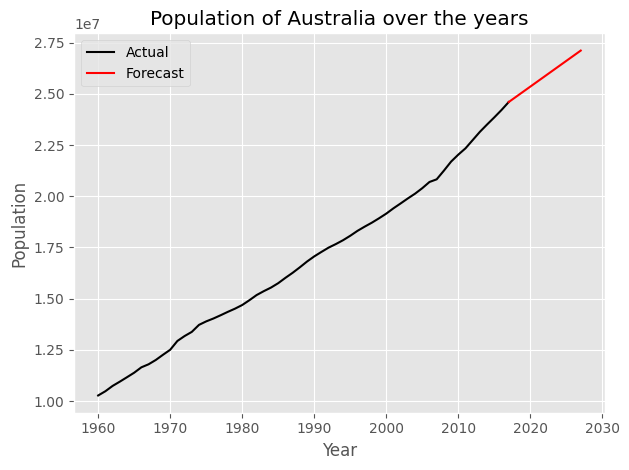

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_population["ds"], aus_population["y"], c="k", label="Actual")
ax.plot(
    range(aus_population["ds"].max(), aus_population["ds"].max() + 11),
    [random_walk_with_drift(aus_population["y"].values, i) for i in range(0, 11)],
    c="r",
    label="Forecast",
)

ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.legend()
ax.set_title("Population of Australia over the years")

plt.tight_layout()
plt.show()

In [ ]:
aus_bricks_prod = (
    pd.read_csv(r"fpppy_data\data\aus_production.csv")
    .filter(["ds", "Bricks"])
    .rename({"Bricks": "y"}, axis=1)
    .dropna(axis=0)
)

In [8]:
aus_bricks_prod.head()

,ds,y
0,1956-01-01,189.0
1,1956-04-01,204.0
2,1956-07-01,208.0
3,1956-10-01,197.0
4,1957-01-01,187.0


In [ ]:
aus_bricks_prod["ds"] = pd.to_datetime(aus_bricks_prod["ds"])

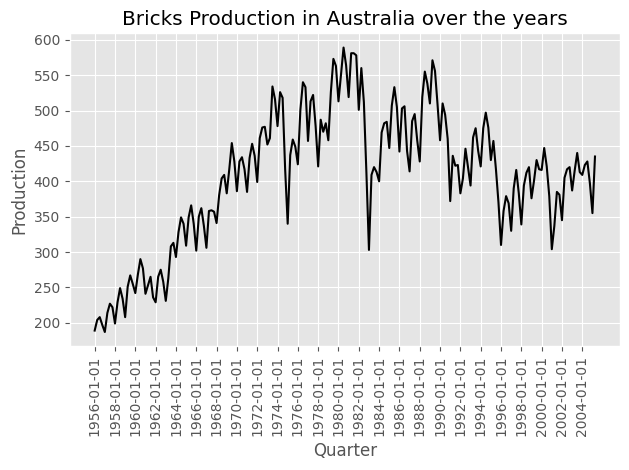

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod["ds"], aus_bricks_prod["y"], c="k")
ax.set_xticks(aus_bricks_prod["ds"][::8], aus_bricks_prod["ds"][::8], rotation=90)
ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.set_title("Bricks Production in Australia over the years")

plt.tight_layout()
plt.show()

In [ ]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [ ]:
from datetime import timedelta

pred_qtr = [aus_bricks_prod["ds"].max()]
pred_val = [aus_bricks_prod["y"].values[-1]]
for h in range(40):
    pred_qtr.append(pred_qtr[-1] + pd.tseries.offsets.QuarterEnd() + timedelta(days=1))
    pred_val.append(seasonal_naive(aus_bricks_prod["y"].values, h, 4))

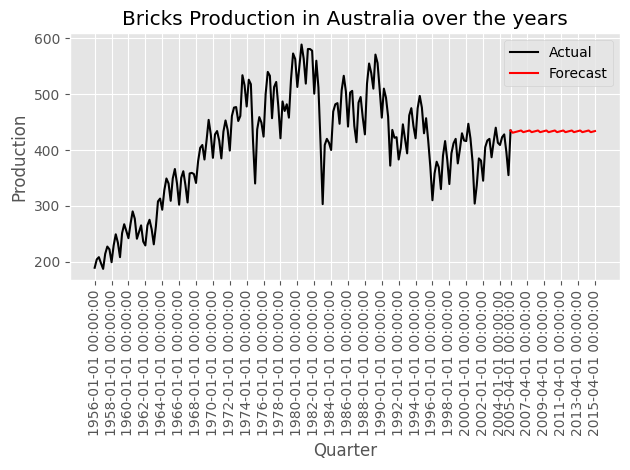

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod["ds"], aus_bricks_prod["y"], c="k", label="Actual")
ax.plot(pred_qtr, pred_val, c="r", label="Forecast")

ax.set_xticks(
    list(aus_bricks_prod["ds"][::8]) + pred_qtr[::8],
    list(aus_bricks_prod["ds"][::8]) + pred_qtr[::8],
    rotation=90,
)
ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.legend()
ax.set_title("Bricks Production in Australia over the years")

plt.tight_layout()
plt.show()

In [ ]:
aus_livestock = pd.read_csv("fpppy_data/data/aus_livestock.csv")
nsw_lambs = aus_livestock.query('`unique_id` == "New South Wales_Lambs"').filter(
    ["ds", "y"]
)
nsw_lambs["ds"] = pd.to_datetime(nsw_lambs["ds"], format="%Y-%m-%d")
nsw_lambs.head()

,ds,y
17088,1972-07-01,587600.0
17089,1972-08-01,553700.0
17090,1972-09-01,494900.0
17091,1972-10-01,533500.0
17092,1972-11-01,574300.0


In [84]:
nsw_lambs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 17088 to 17645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      558 non-null    datetime64[ns]
 1   y       558 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


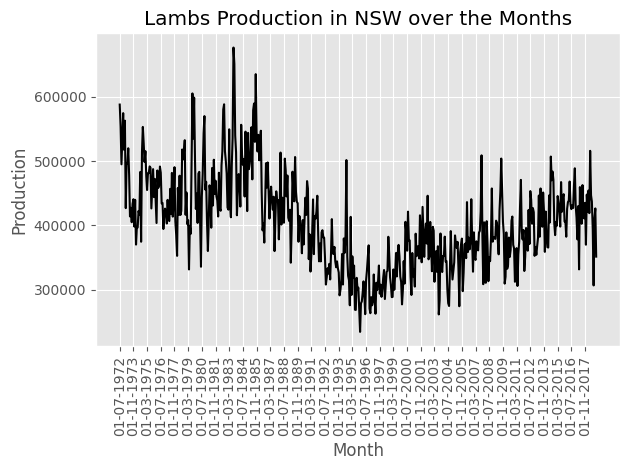

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nsw_lambs["ds"], nsw_lambs["y"], c="k")
ax.set_xticks(
    nsw_lambs["ds"][::16], nsw_lambs["ds"][::16].dt.strftime("%d-%m-%Y"), rotation=90
)
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.set_title("Lambs Production in NSW over the Months")

plt.tight_layout()
plt.show()

In [78]:
def naive(y):
    return y[-1]

In [ ]:
from datetime import timedelta

pred_per = [nsw_lambs["ds"].max()]
pred_val = [nsw_lambs["y"].values[-1]]
for _ in range(40):
    pred_per.append((pred_per[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1)))
    pred_val.append(naive(nsw_lambs["y"].values))

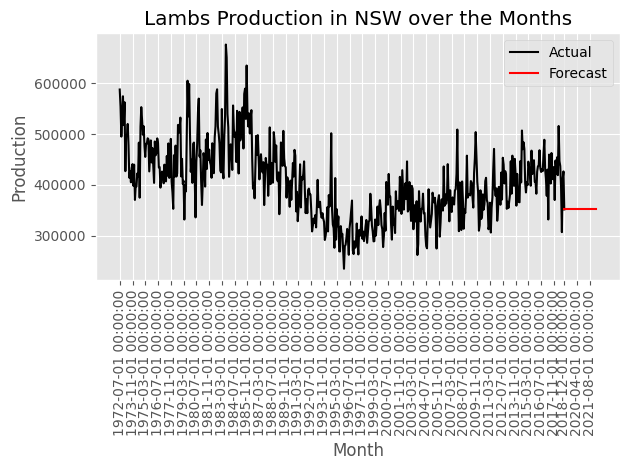

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nsw_lambs["ds"], nsw_lambs["y"], c="k", label="Actual")
ax.plot(pred_per, pred_val, c="r", label="Forecast")

ax.set_xticks(
    list(nsw_lambs["ds"][::16]) + pred_per[::16],
    list(nsw_lambs["ds"][::16]) + pred_per[::16],
    rotation=90,
)
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.legend()
ax.set_title("Lambs Production in NSW over the Months")

plt.tight_layout()
plt.show()

In [ ]:
aus_retail = pd.read_csv("fpppy_data/data/aus_retail.csv")
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [ ]:
aus_takeaway = (
    aus_retail.query('`Industry` == "Takeaway food services"')
    .filter(["Month", "Turnover"])
    .rename({"Month": "ds", "Turnover": "y"}, axis=1)
)
aus_takeaway["ds"] = pd.to_datetime(aus_takeaway["ds"])
aus_takeaway = aus_takeaway.sort_values(["ds"], axis=0).reset_index(drop=True)
aus_takeaway = aus_takeaway.groupby(["ds"], as_index=False)["y"].sum()
aus_takeaway.head()

,ds,y
0,1982-04-01,193.7
1,1982-05-01,193.9
2,1982-06-01,186.3
3,1982-07-01,189.5
4,1982-08-01,190.5


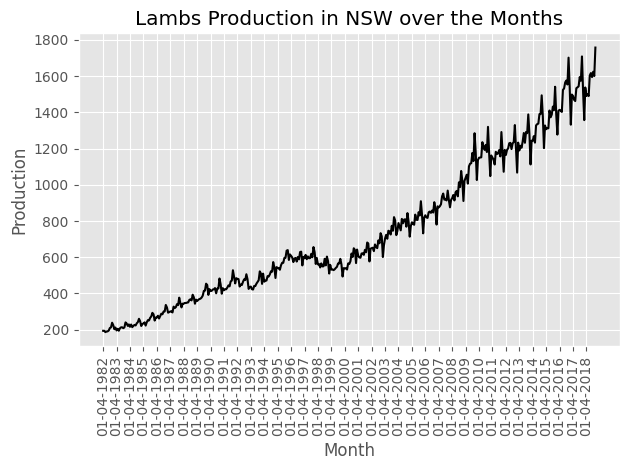

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_takeaway["ds"], aus_takeaway["y"], c="k")
ax.set_xticks(
    aus_takeaway["ds"][::12],
    aus_takeaway["ds"][::12].dt.strftime("%d-%m-%Y"),
    rotation=90,
)
ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.set_title("Australian takeaway food turnover over the years")

plt.tight_layout()
plt.show()

In [ ]:
pred_ds = [aus_takeaway["ds"].values[-1]]
pred_y = [aus_takeaway["y"].values[-1]]

for h in range(24):
    pred_ds.append(pred_ds[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1))
    pred_y.append(random_walk_with_drift(aus_takeaway["y"].values, h))

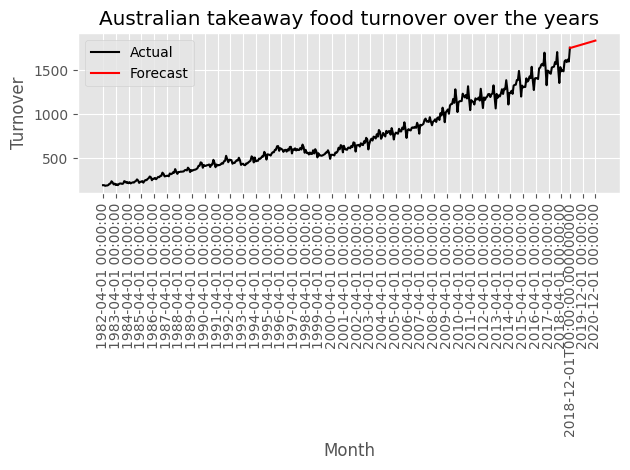

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_takeaway["ds"], aus_takeaway["y"], c="k", label="Actual")
ax.plot(pred_ds, pred_y, c="r", label="Forecast")

ax.set_xticks(
    list(aus_takeaway["ds"][::12]) + pred_ds[::12],
    list(aus_takeaway["ds"][::12]) + pred_ds[::12],
    rotation=90,
)
ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.legend()
ax.set_title("Australian takeaway food turnover over the years")

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("ggplot")

In [ ]:
gafa_stock = pd.read_csv("fpppy_data/data/gafa_stock.csv")
gafa_stock.head()

,unique_id,ds,y
0,AAPL_Open,2014-01-02,79.382858
1,AAPL_Open,2014-01-03,78.980003
2,AAPL_Open,2014-01-06,76.778572
3,AAPL_Open,2014-01-07,77.760002
4,AAPL_Open,2014-01-08,76.972855


In [ ]:
fb_close = gafa_stock.query('`unique_id` == "FB_Close"').filter(["ds", "y"])
fb_close["ds"] = range(fb_close.shape[0])
fb_close = fb_close.reset_index(drop=True)
fb_close.head()

,ds,y
0,0,54.709999
1,1,54.560001
2,2,57.200001
3,3,57.919998
4,4,58.230000


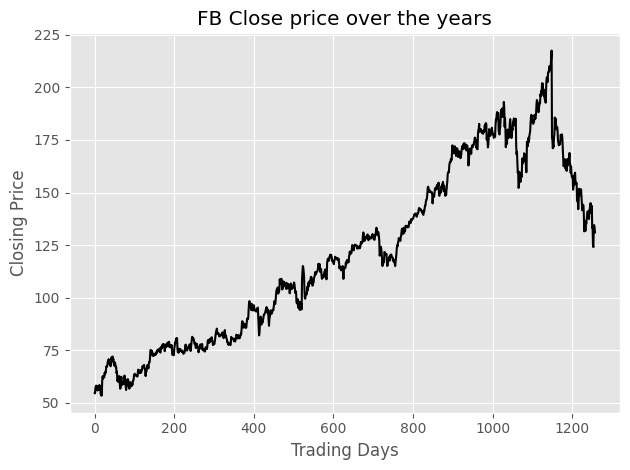

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(fb_close["ds"], fb_close["y"], c="k")
ax.set_xlabel("Trading Days")
ax.set_ylabel("Closing Price")
ax.set_title("FB Close price over the years")

plt.tight_layout()
plt.show()

In [6]:
def mean(y):
    return np.mean(y)

In [7]:
def naive(y):
    yT = y[-1]
    return yT

In [ ]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [ ]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT + h * ((yT - y1) / (T - 1))

In [ ]:
pred_ds = [fb_close["ds"].values[-1]]
pred_mean = [fb_close["y"].values[-1]]
pred_naive = [fb_close["y"].values[-1]]
pred_snaive = [fb_close["y"].values[-1]]
pred_rwwd = [fb_close["y"].values[-1]]

for h in range(200):
    pred_ds.append(pred_ds[-1] + 1)
    pred_mean.append(mean(fb_close["y"].values))
    pred_naive.append(naive(fb_close["y"].values))
    pred_snaive.append(seasonal_naive(fb_close["y"].values, h, 100))
    pred_rwwd.append(random_walk_with_drift(fb_close["y"].values, h))

In [ ]:
def mean(y):
    return np.mean(y)

In [ ]:
def naive(y):
    yT = y[-1]
    return yT

In [ ]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [ ]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT + h * ((yT - y1) / (T - 1))

In [ ]:
pred_ds = [fb_close["ds"].values[-1]]
pred_mean = [fb_close["y"].values[-1]]
pred_naive = [fb_close["y"].values[-1]]
pred_snaive = [fb_close["y"].values[-1]]
pred_rwwd = [fb_close["y"].values[-1]]

for h in range(200):
    pred_ds.append(pred_ds[-1] + 1)
    pred_mean.append(mean(fb_close["y"].values))
    pred_naive.append(naive(fb_close["y"].values))
    pred_snaive.append(seasonal_naive(fb_close["y"].values, h, 100))
    pred_rwwd.append(random_walk_with_drift(fb_close["y"].values, h))

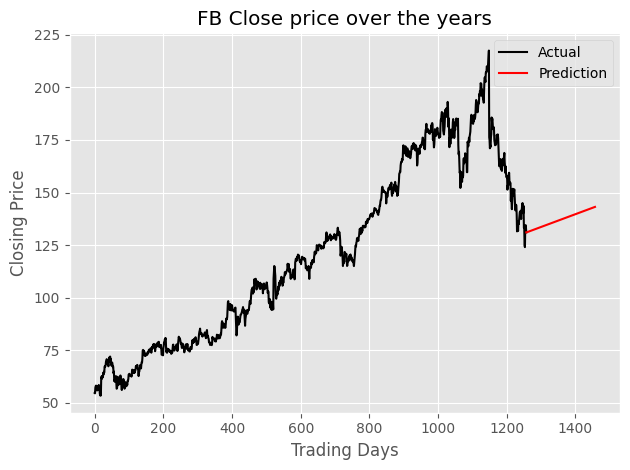

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(fb_close["ds"], fb_close["y"], c="k", label="Actual")
ax.plot(pred_ds, pred_rwwd, c="r", label="Prediction")

ax.set_xlabel("Trading Days")
ax.set_ylabel("Closing Price")
ax.set_title("FB Close price over the years")
ax.legend()

plt.tight_layout()
plt.show()

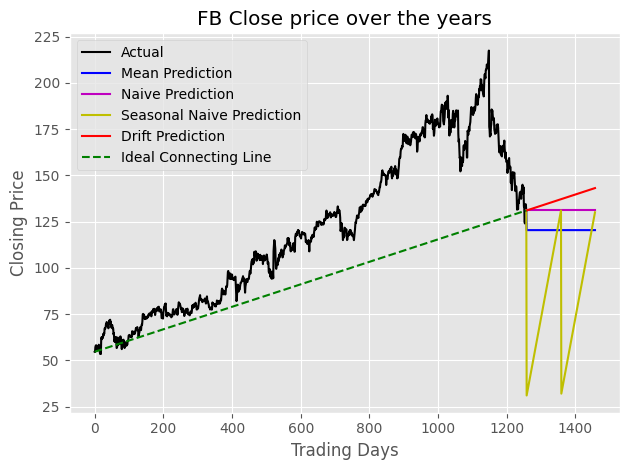

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(fb_close["ds"], fb_close["y"], c="k", label="Actual")
ax.plot(pred_ds, pred_mean, c="b", label="Mean Prediction")
ax.plot(pred_ds, pred_naive, c="m", label="Naive Prediction")
ax.plot(pred_ds, pred_snaive, c="y", label="Seasonal Naive Prediction")
ax.plot(pred_ds, pred_rwwd, c="r", label="Drift Prediction")
ax.plot(
    [fb_close["ds"].values[0], fb_close["ds"].values[-1]],
    [fb_close["y"].values[0], fb_close["y"].values[-1]],
    c="g",
    ls="--",
    label="Ideal Connecting Line",
)

ax.set_xlabel("Trading Days")
ax.set_ylabel("Closing Price")
ax.set_title("FB Close price over the years")
ax.legend()

plt.tight_layout()
plt.show()

According to me, naive prediction is the best one.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.style.use("ggplot")

In [3]:
aus_production = pd.read_csv("fpppy_data/data/aus_production.csv")
aus_production["ds"] = pd.to_datetime(aus_production["ds"])

In [4]:
aus_production.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


In [5]:
recent_production = aus_production.query("ds.dt.year >= 1992").filter(["ds", "Beer"])
recent_production.head()

,ds,Beer
144,1992-01-01,443
145,1992-04-01,410
146,1992-07-01,420
147,1992-10-01,532
148,1993-01-01,433


In [6]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [7]:
recent_production["pred"] = [
    seasonal_naive(recent_production["Beer"].values, h, 4)
    for h in range(recent_production.shape[0])
]

In [8]:
recent_production["resid"] = recent_production["Beer"] - recent_production["pred"]
recent_production.head()

,ds,Beer,pred,resid
144,1992-01-01,443,370,73
145,1992-04-01,410,371,39
146,1992-07-01,420,372,48
147,1992-10-01,532,373,159
148,1993-01-01,433,374,59


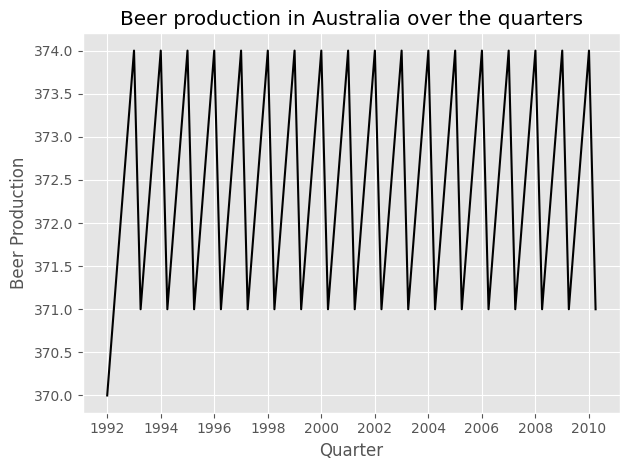

In [9]:
fig = plt.figure()
ax = fig.gca()

ax.plot(
    recent_production["ds"], recent_production["pred"], c="k", label="Fitted Values"
)
ax.set_xlabel("Quarter")
ax.set_ylabel("Beer Production")
ax.set_title("Beer production in Australia over the quarters")

plt.tight_layout()
plt.show()

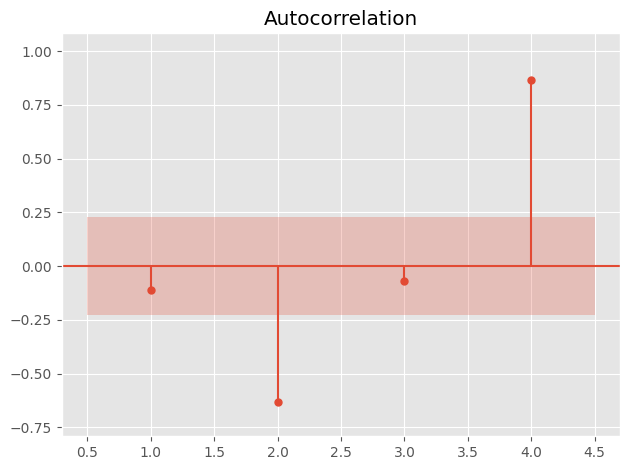

In [12]:
fig = plt.figure()
ax = fig.gca()

plot_acf(
    recent_production["resid"],
    ax=ax,
    lags=4,
    zero=False,
    auto_ylims=True,
    bartlett_confint=False,
)

plt.tight_layout()
plt.show()

In [43]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
global_economy = pd.read_csv("fpppy_data/data/global_economy.csv")
global_economy.head()

,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [41]:
aus_export = (
    global_economy.query("`Code` == 'AUS'")
    .filter(["ds", "Exports"])
    .rename({"Exports": "y"}, axis=1)
)
aus_export["ds"] = pd.to_datetime(aus_export["ds"], format="%Y")
aus_export = aus_export.sort_values(by=["ds"]).reset_index(drop=True)
aus_export.head()

,ds,y
0,1960-01-01,12.994452
1,1961-01-01,12.403101
2,1962-01-01,13.943012
3,1963-01-01,13.005886
4,1964-01-01,14.938248


In [34]:
aus_production = pd.read_csv("fpppy_data/data/aus_production.csv")
aus_production.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


In [ ]:
aus_beer_production = aus_production.filter(["ds", "Beer"]).rename(
    {"Beer": "y"}, axis=1
)
aus_beer_production["ds"] = pd.to_datetime(aus_beer_production["ds"], format="%Y-%m-%d")
aus_beer_production = aus_beer_production.sort_values(by=["ds"]).reset_index(drop=True)
aus_beer_production.head()

,ds,y
0,1956-01-01,284
1,1956-04-01,213
2,1956-07-01,227
3,1956-10-01,308
4,1957-01-01,262


In [28]:
def naive(y):
    yT = y[-1]
    return yT

In [29]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

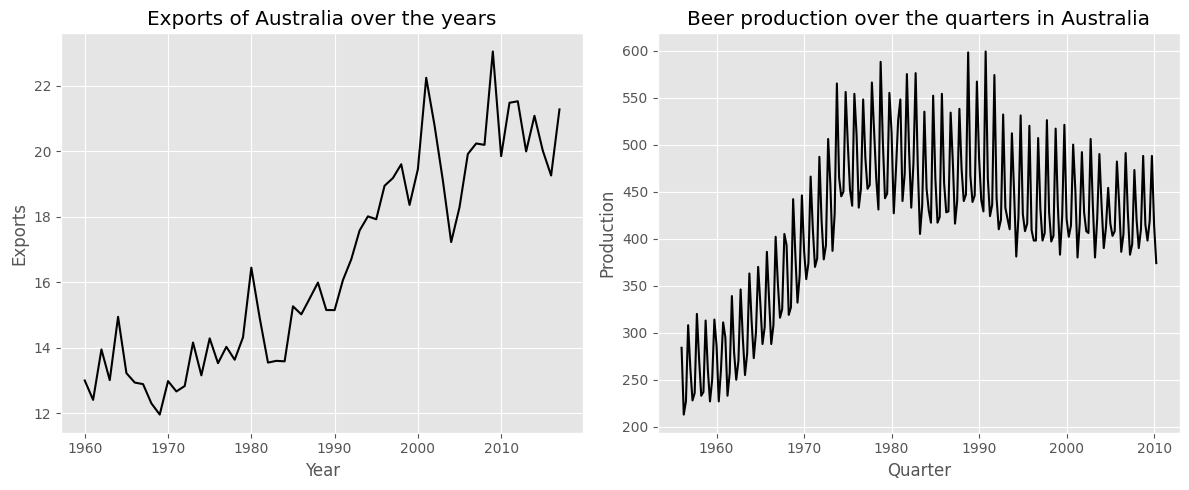

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(aus_export["ds"], aus_export["y"], c="k")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Exports")
axes[0].set_title("Exports of Australia over the years")

axes[1].plot(aus_beer_production["ds"], aus_beer_production["y"], c="k")
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Production")
axes[1].set_title("Beer production over the quarters in Australia")

plt.tight_layout()
plt.show()

In [49]:
aus_export_pred_ds = [aus_export["ds"].values[-1]]
aus_export_pred_y = [aus_export["y"].values[-1]]
aus_beer_production_pred_ds = [aus_beer_production["ds"].values[-1]]
aus_beer_production_pred_y = [aus_beer_production["y"].values[-1]]

for h in range(12):
    aus_export_pred_ds.append(
        aus_export_pred_ds[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1)
    )
    aus_export_pred_y.append(naive(aus_export["y"].values))
    aus_beer_production_pred_ds.append(
        aus_beer_production_pred_ds[-1]
        + pd.tseries.offsets.QuarterEnd()
        + timedelta(days=1)
    )
    aus_beer_production_pred_y.append(
        seasonal_naive(aus_beer_production["y"].values, h, 4)
    )

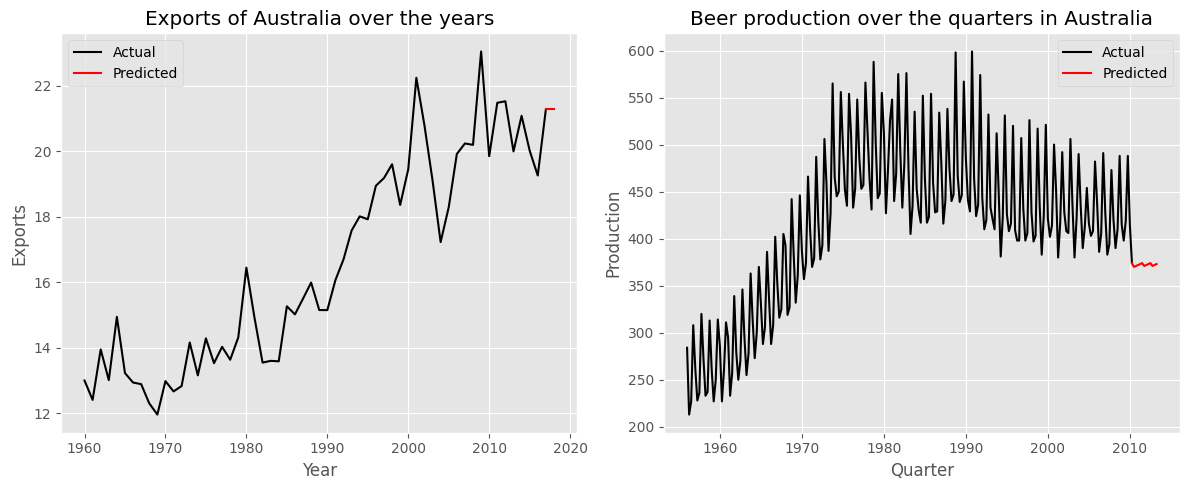

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(aus_export["ds"], aus_export["y"], c="k", label="Actual")
axes[0].plot(aus_export_pred_ds, aus_export_pred_y, c="r", label="Predicted")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Exports")
axes[0].set_title("Exports of Australia over the years")
axes[0].legend()

axes[1].plot(aus_beer_production["ds"], aus_beer_production["y"], c="k", label="Actual")
axes[1].plot(
    aus_beer_production_pred_ds, aus_beer_production_pred_y, c="r", label="Predicted"
)
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Production")
axes[1].set_title("Beer production over the quarters in Australia")
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from datetime import timedelta

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [11]:
plt.style.use("ggplot")

In [12]:
aus_livestock = pd.read_csv("fpppy_data/data/aus_livestock.csv")

In [ ]:
vic_livestock = aus_livestock.query(
    "`unique_id`.str.startswith('Victoria')", engine="python"
)
vic_livestock["ds"] = pd.to_datetime(vic_livestock["ds"])


vic_livestock.head()

C:\Users\70082692\AppData\Local\Temp\ipykernel_36012\2975470552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vic_livestock["ds"] = pd.to_datetime(vic_livestock["ds"])


,unique_id,ds,y
3036,"Victoria_Bulls, bullocks and steers",1976-07-01,109200.0
3037,"Victoria_Bulls, bullocks and steers",1976-08-01,94700.0
3038,"Victoria_Bulls, bullocks and steers",1976-09-01,95500.0
3039,"Victoria_Bulls, bullocks and steers",1976-10-01,94800.0
3040,"Victoria_Bulls, bullocks and steers",1976-11-01,94100.0


In [26]:
unique_id = vic_livestock["unique_id"].unique()
unique_id

array(['Victoria_Bulls, bullocks and steers', 'Victoria_Calves',
       'Victoria_Cattle (excl. calves)', 'Victoria_Cows and heifers',
       'Victoria_Lambs', 'Victoria_Pigs', 'Victoria_Sheep'], dtype=object)

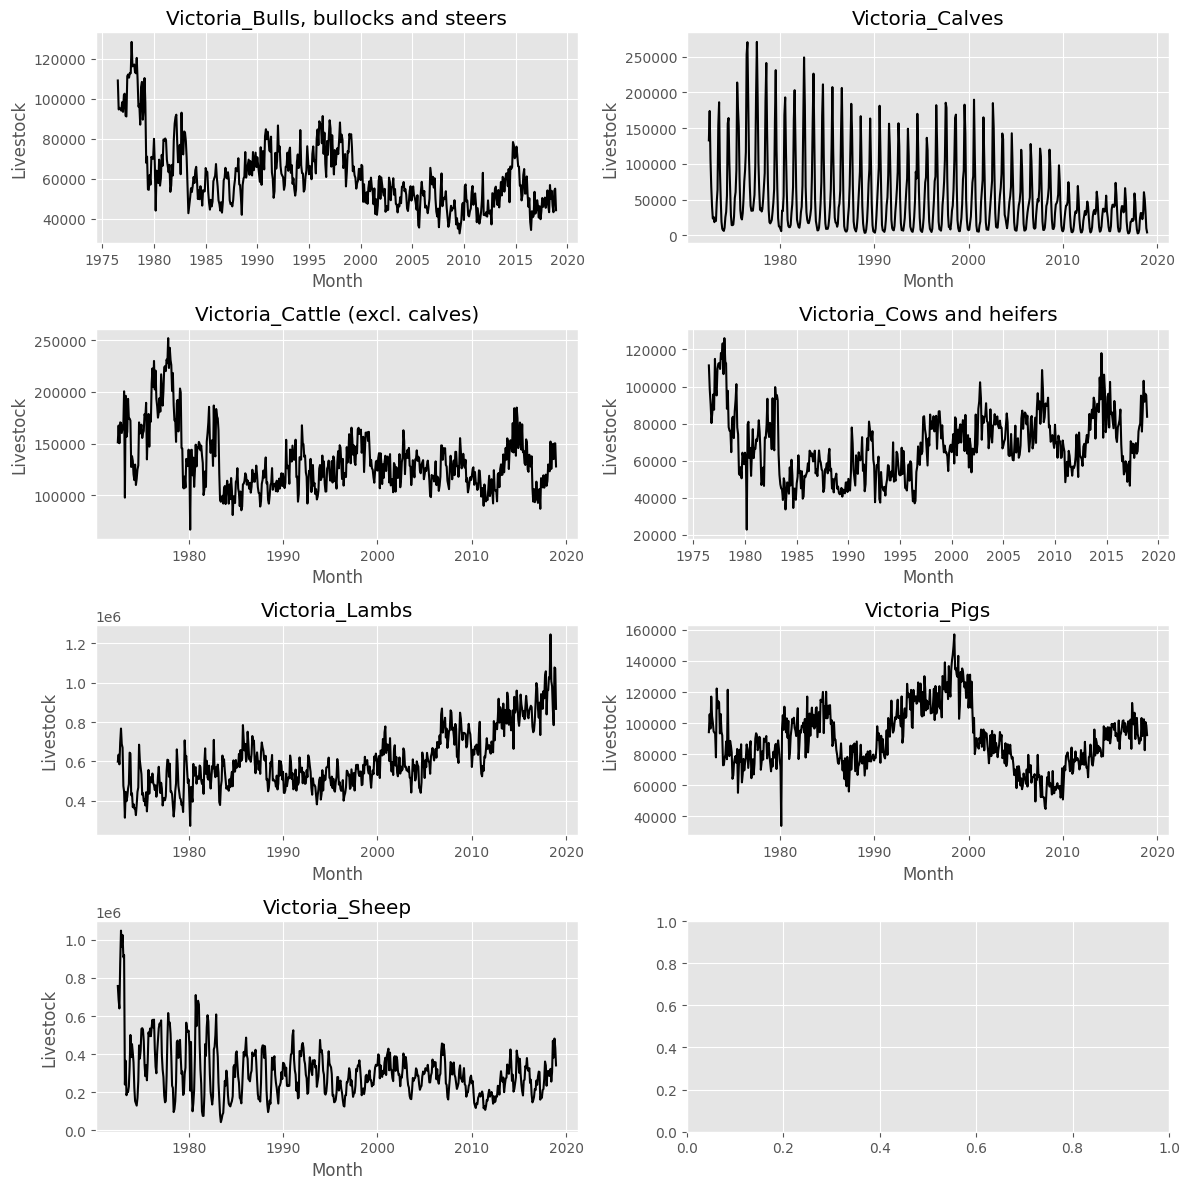

In [27]:
a = np.arange(unique_id.shape[0] + 1)
shape = np.reshape(a, (-1, 2)).shape
indices = np.unravel_index(a, shape)
indices = list(zip(indices[0], indices[1]))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 12))

for i, uid in enumerate(unique_id):
    df = (
        vic_livestock.query(f"`unique_id` == '{uid}'")
        .filter(["ds", "y"])
        .reset_index(drop=True)
    )
    axes[indices[i]].plot(df["ds"], df["y"], c="k")
    axes[indices[i]].set_xlabel("Month")
    axes[indices[i]].set_ylabel("Livestock")
    axes[indices[i]].set_title(uid)

plt.tight_layout()
plt.show()

In [33]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

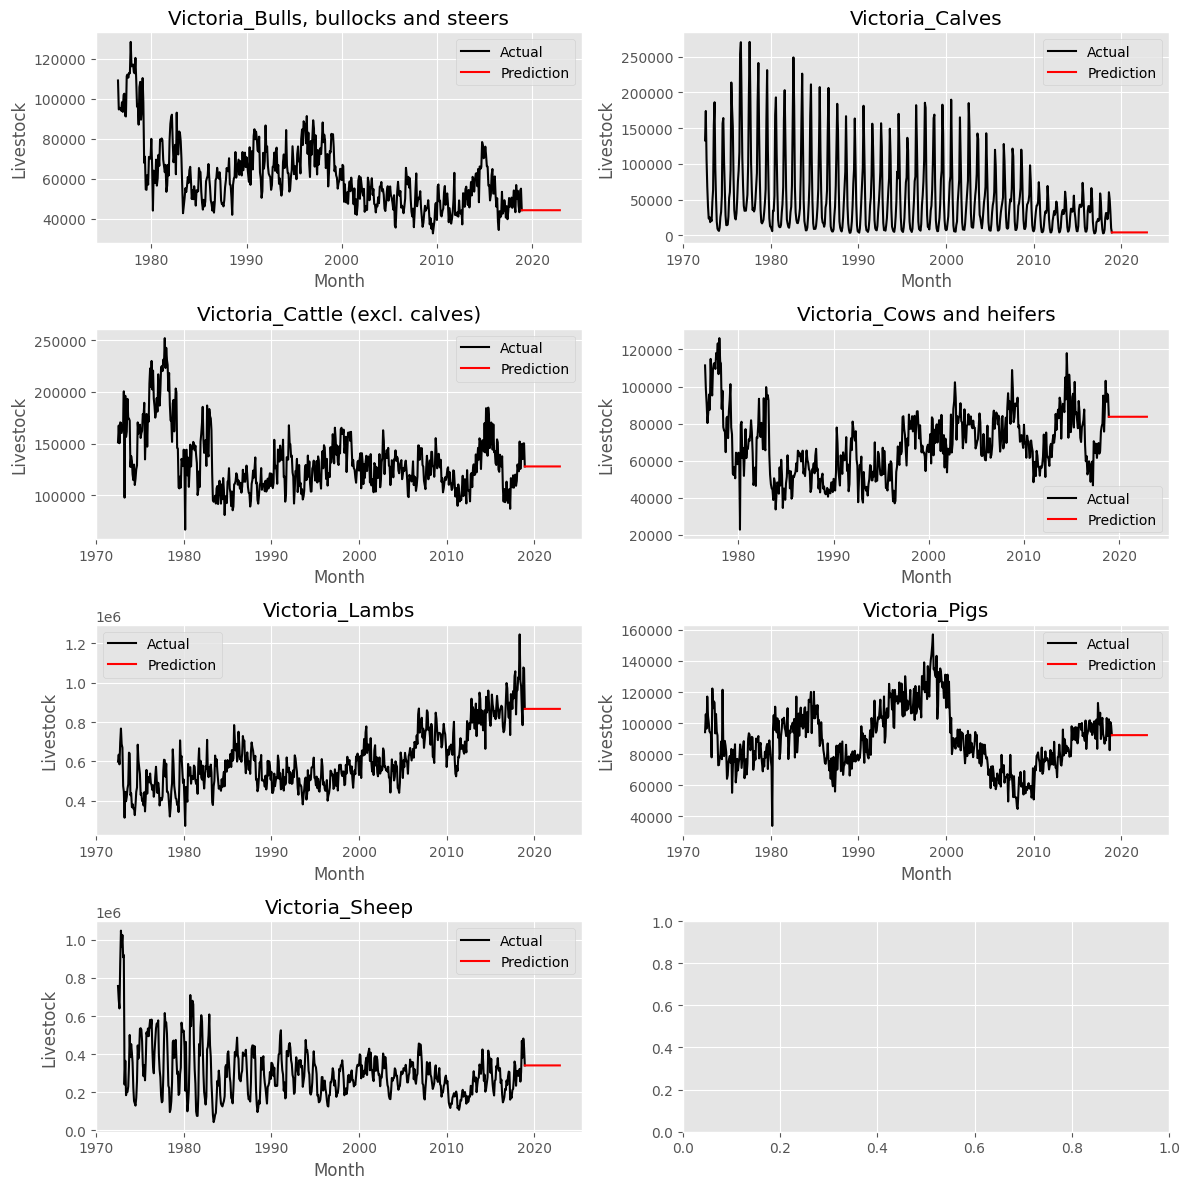

In [ ]:
a = np.arange(unique_id.shape[0] + 1)
shape = np.reshape(a, (-1, 2)).shape
indices = np.unravel_index(a, shape)
indices = list(zip(indices[0], indices[1]))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 12))

for i, uid in enumerate(unique_id):
    df = (
        vic_livestock.query(f"`unique_id` == '{uid}'")
        .filter(["ds", "y"])
        .reset_index(drop=True)
    )
    pred_ds = [df["ds"].values[-1]]
    pred_y = [df["y"].values[-1]]

    for h in range(48):
        pred_ds.append(pred_ds[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1))
        pred_y.append(seasonal_naive(df["y"].values, h, 12))

    axes[indices[i]].plot(df["ds"], df["y"], c="k", label="Actual")
    axes[indices[i]].plot(pred_ds, pred_y, c="r", label="Prediction")

    axes[indices[i]].set_xlabel("Month")
    axes[indices[i]].set_ylabel("Livestock")
    axes[indices[i]].set_title(uid)
    axes[indices[i]].legend()

plt.tight_layout()
plt.show()

1. False- It is a good to have property, but we can't do much here.
2. False- Residules are calculated based on the fitted values and not based on the predictions. Hence, if model overfits, it may give small residules, but it may not give good predictions always.
3. False- MAPE is good measure if we need to compare models fitted for the independent variable with differenet units, however, it may give undefined result if the actual value is 0.
4. False- It is not guaranteed that complicated models will give better result.
5. True- Better accuracy on the test case ensures that the model is performing well on the unseen dataset.


In [1]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.style.use("ggplot")

In [3]:
aus_retail = pd.read_csv("fpppy_data/data/aus_retail.csv")
aus_retail["Month"] = pd.to_datetime(aus_retail["Month"])
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [4]:
np.random.seed(12345678)
random_series_id = np.random.choice(aus_retail["Series ID"].unique(), 1)[0]
myseries = aus_retail.query("`Series ID` == @random_series_id")

In [5]:
data = myseries.rename({"Month": "ds"}, axis=1)

In [6]:
train = data.query("ds.dt.year < 2011")
test = data.query("ds.dt.year >= 2011")

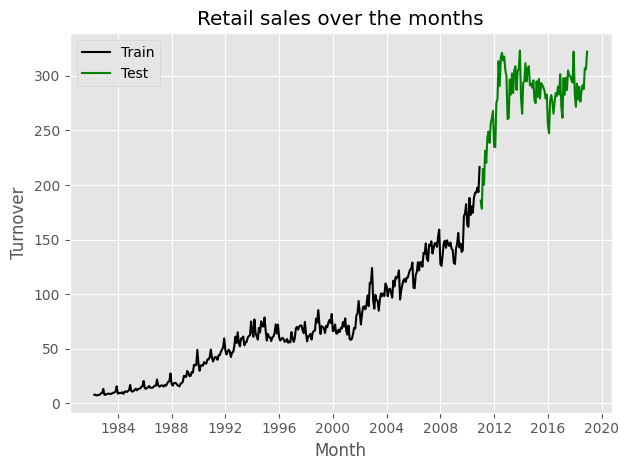

In [7]:
fig = plt.figure()
ax = fig.gca()

ax.plot(train["ds"], train["Turnover"], c="k", label="Train")
ax.plot(test["ds"], test["Turnover"], c="g", label="Test")

ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.set_title("Retail sales over the months")
ax.legend()

plt.tight_layout()
plt.show()

In [8]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [9]:
fitted_val = []
pred_val = []

for h in range(train.shape[0]):
    fitted_val.append(seasonal_naive(train["Turnover"].values, h, 12))

for h in range(test.shape[0]):
    pred_val.append(seasonal_naive(train["Turnover"].values, h, 12))

In [ ]:
resid = (train["Turnover"] - fitted_val).values

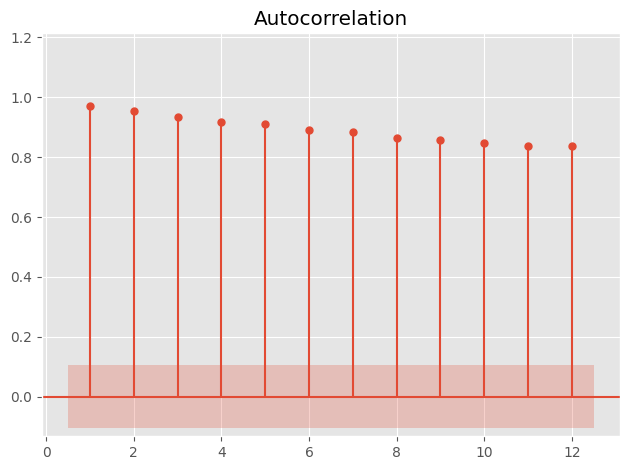

In [11]:
fig = plt.figure()
ax = fig.gca()

plot_acf(resid, ax, lags=12, zero=False, auto_ylims=True, bartlett_confint=False)

plt.tight_layout()
plt.show()

In [17]:
def mse(y, yhat):
    return np.sum(np.square(y - yhat)) / y.shape[0]


def rmse(y, yhat):
    return np.sqrt(mse(y, yhat))


def mape(y, yhat):
    return np.sum(np.abs(y - yhat) / y) / y.shape[0]

In [18]:
print("MSE", mse(test["Turnover"], pred_val))
print("RMSE", rmse(test["Turnover"], pred_val))
print("MAPE", mape(test["Turnover"], pred_val))

MSE 5755.689583333334
RMSE 75.86626116616881
MAPE 0.24919109307950085


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [29]:
plt.style.use("ggplot")

In [22]:
aus_livestock = pd.read_csv("fpppy_data/data/aus_livestock.csv")
aus_livestock.head()

,unique_id,ds,y
0,"Australian Capital Territory_Bulls, bullocks a...",1976-07-01,2300.0
1,"Australian Capital Territory_Bulls, bullocks a...",1976-08-01,2100.0
2,"Australian Capital Territory_Bulls, bullocks a...",1976-09-01,2100.0
3,"Australian Capital Territory_Bulls, bullocks a...",1976-10-01,1900.0
4,"Australian Capital Territory_Bulls, bullocks a...",1976-11-01,2100.0


In [ ]:
nswpigs = aus_livestock.query("`unique_id` == 'New South Wales_Pigs'").filter(
    ["ds", "y"]
)
nswpigs["ds"] = pd.to_datetime(nswpigs["ds"])
nswpigs = nswpigs.sort_values(["ds"]).reset_index(drop=True)
nswpigs.head()

,ds,y
0,1972-07-01,97400.0
1,1972-08-01,114700.0
2,1972-09-01,109900.0
3,1972-10-01,108300.0
4,1972-11-01,122200.0


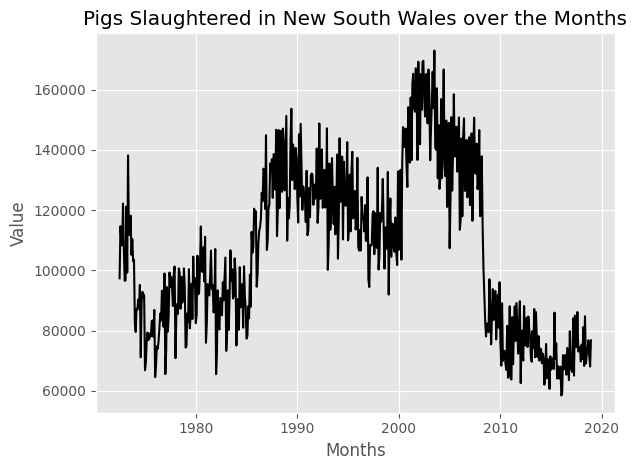

In [31]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nswpigs["ds"], nswpigs["y"], c="k")
ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Pigs Slaughtered in New South Wales over the Months")

plt.tight_layout()
plt.show()

In [33]:
train, test = nswpigs.iloc[:486, :], nswpigs.iloc[486:, :]
print(train.shape)
print(test.shape)

(486, 2)
(72, 2)


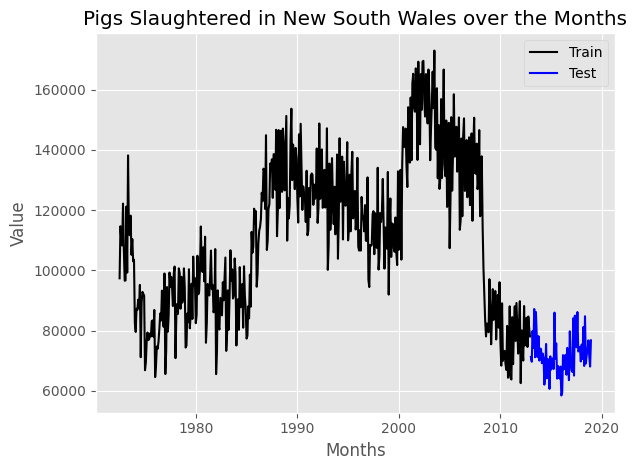

In [36]:
fig = plt.figure()
ax = fig.gca()

ax.plot(train["ds"], train["y"], c="k", label="Train")
ax.plot(test["ds"], test["y"], c="b", label="Test")

ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Pigs Slaughtered in New South Wales over the Months")
ax.legend()

plt.tight_layout()
plt.show()

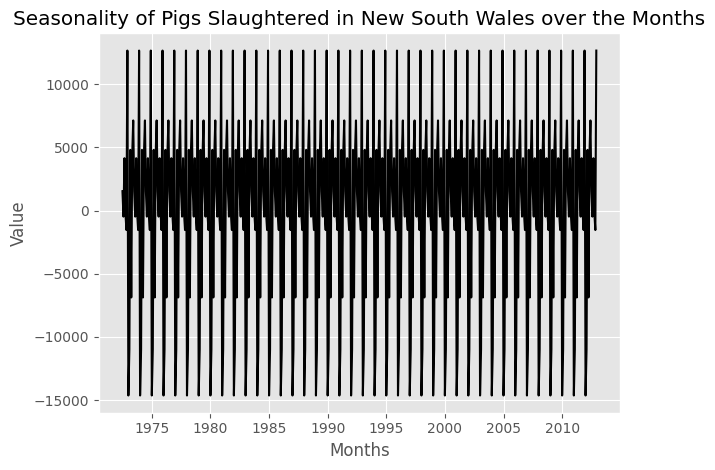

In [44]:
dcmp = seasonal_decompose(train["y"], period=12)

fig = plt.figure()
ax = fig.gca()

ax.plot(train["ds"], dcmp.seasonal, c="k")
ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Seasonality of Pigs Slaughtered in New South Wales over the Months")

plt.tight_layout()
plt.show()

In [45]:
def mean(y):
    return np.mean(y)

In [46]:
def naive(y):
    yT = y[-1]
    return yT

In [47]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [48]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT + h * ((yT - y1) / (T - 1))

In [54]:
pred_mean = [train["y"].values[-1]]
pred_naive = [train["y"].values[-1]]
pred_snaive = [train["y"].values[-1]]
pred_rwwd = [train["y"].values[-1]]

for h in range(test.shape[0]):
    pred_mean.append(mean(train["y"].values))
    pred_naive.append(naive(train["y"].values))
    pred_snaive.append(seasonal_naive(train["y"].values, h, 12))
    pred_rwwd.append(random_walk_with_drift(train["y"].values, h))

pred_mean = pred_mean[1:]
pred_naive = pred_naive[1:]
pred_snaive = pred_snaive[1:]
pred_rwwd = pred_rwwd[1:]

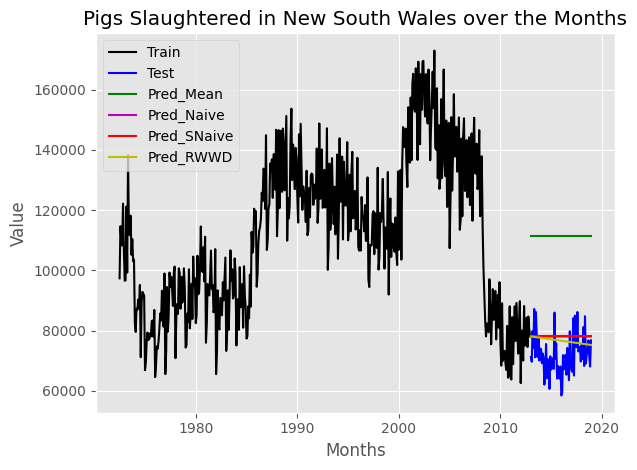

In [58]:
fig = plt.figure()
ax = fig.gca()

ax.plot(train["ds"], train["y"], c="k", label="Train")
ax.plot(test["ds"], test["y"], c="b", label="Test")
ax.plot(test["ds"], pred_mean, c="g", label="Pred_Mean")
ax.plot(test["ds"], pred_naive, c="m", label="Pred_Naive")
ax.plot(test["ds"], pred_snaive, c="r", label="Pred_SNaive")
ax.plot(test["ds"], pred_rwwd, c="y", label="Pred_RWWD")

ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Pigs Slaughtered in New South Wales over the Months")
ax.legend()

plt.tight_layout()
plt.show()

In [71]:
fitted_rwwd = []
fitted_mean = []
for h in range(train.shape[0]):
    fitted_rwwd.append(random_walk_with_drift(train["y"].values, h))
    fitted_mean.append(mean(train["y"].values))

In [ ]:
resid_rwwd = train["y"] - fitted_rwwd
resid_mean = train["y"] - fitted_mean

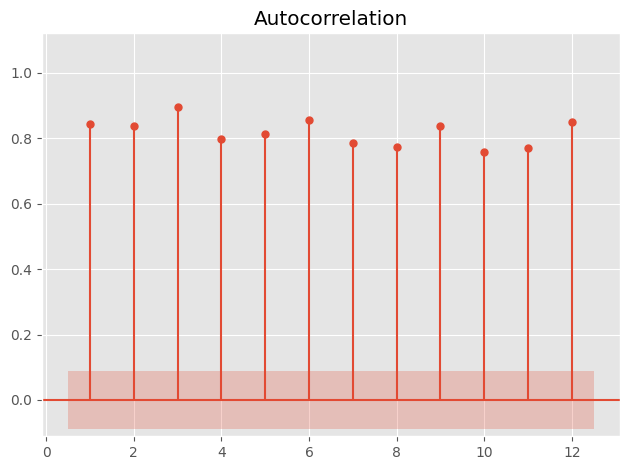

In [73]:
fig = plt.figure()
ax = fig.gca()

plot_acf(resid_rwwd, ax, 12, zero=False, auto_ylims=True, bartlett_confint=False)

plt.tight_layout()
plt.show()

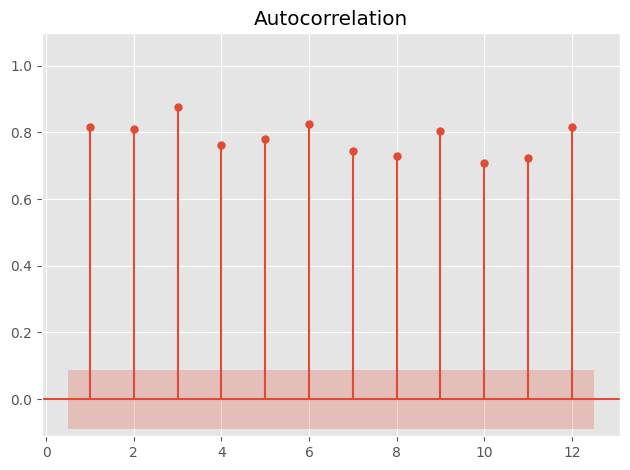

In [74]:
fig = plt.figure()
ax = fig.gca()

plot_acf(resid_mean, ax, 12, zero=False, auto_ylims=True, bartlett_confint=False)

plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.style.use("ggplot")

In [3]:
aus_retail = pd.read_csv("fpppy_data/data/aus_retail.csv")
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [4]:
aus_retail["Industry"].unique()

array(['Cafes, restaurants and catering services',
       'Cafes, restaurants and takeaway food services',
       'Clothing retailing',
       'Clothing, footwear and personal accessory retailing',
       'Department stores', 'Electrical and electronic goods retailing',
       'Food retailing',
       'Footwear and other personal accessory retailing',
       'Furniture, floor coverings, houseware and textile goods retailing',
       'Hardware, building and garden supplies retailing',
       'Household goods retailing', 'Liquor retailing',
       'Newspaper and book retailing',
       'Other recreational goods retailing', 'Other retailing',
       'Other retailing n.e.c.', 'Other specialised food retailing',
       'Pharmaceutical, cosmetic and toiletry goods retailing',
       'Supermarket and grocery stores', 'Takeaway food services'],
      dtype=object)

In [5]:
aus_food_takeaway = (
    aus_retail.query("`Industry` == 'Takeaway food services'")
    .filter(["Month", "Turnover"])
    .rename({"Month": "ds", "Turnover": "y"}, axis=1)
    .groupby(["ds"], as_index=False)["y"]
    .sum()
)
aus_food_takeaway["ds"] = pd.to_datetime(aus_food_takeaway["ds"])
aus_food_takeaway.head()

,ds,y
0,1982-04-01,193.7
1,1982-05-01,193.9
2,1982-06-01,186.3
3,1982-07-01,189.5
4,1982-08-01,190.5


In [6]:
train_years = np.sort(aus_food_takeaway["ds"].dt.year.unique())[:-4] 
test_years = np.sort(aus_food_takeaway["ds"].dt.year.unique())[-4:]

train = aus_food_takeaway.query("`ds`.dt.year in @train_years")
test = aus_food_takeaway.query("`ds`.dt.year in @test_years")

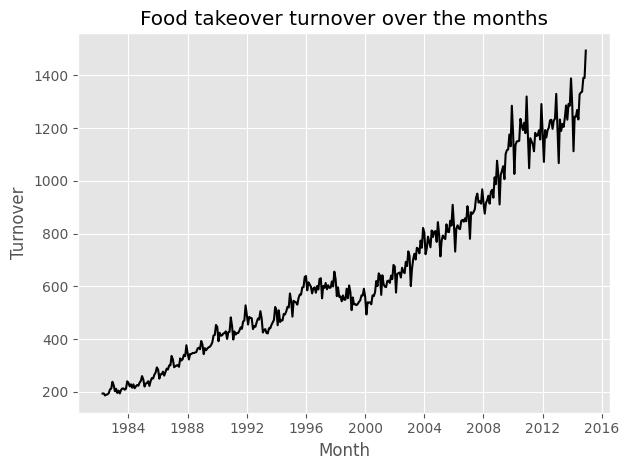

In [7]:
fig = plt.figure()
ax = fig.gca()

ax.plot(train["ds"], train["y"], c="k")
ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.set_title("Food takeover turnover over the months")

plt.tight_layout()
plt.show()

In [11]:
def mean(y):
    return np.mean(y)

In [12]:
def naive(y):
    yT = y[-1]
    return yT

In [13]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [14]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT + h * ((yT - y1) / (T - 1))

In [15]:
pred_mean = [train["y"].values[-1]]
pred_naive = [train["y"].values[-1]]
pred_snaive = [train["y"].values[-1]]
pred_rwwd = [train["y"].values[-1]]

for h in range(test.shape[0]):
    pred_mean.append(mean(train["y"].values))
    pred_naive.append(naive(train["y"].values))
    pred_snaive.append(seasonal_naive(train["y"].values, h, 12))
    pred_rwwd.append(random_walk_with_drift(train["y"].values, h))

pred_mean = pred_mean[1:]
pred_naive = pred_naive[1:]
pred_snaive = pred_snaive[1:]
pred_rwwd = pred_rwwd[1:]

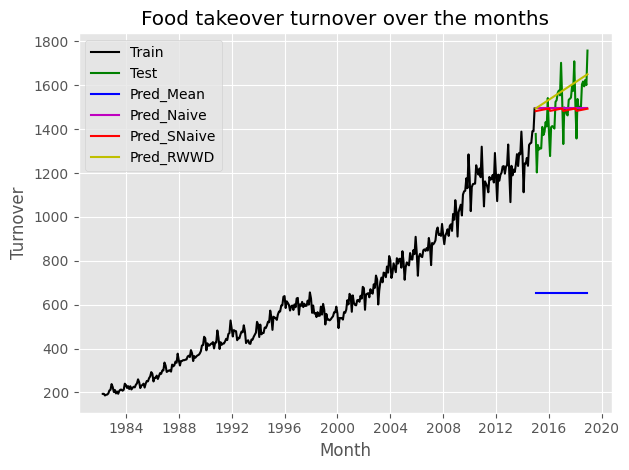

In [16]:
fig = plt.figure()
ax = fig.gca()

ax.plot(train["ds"], train["y"], c="k", label="Train")
ax.plot(test["ds"], test["y"], c="g", label="Test")
ax.plot(test["ds"], pred_mean, c="b", label="Pred_Mean")
ax.plot(test["ds"], pred_naive, c="m", label="Pred_Naive")
ax.plot(test["ds"], pred_snaive, c="r", label="Pred_SNaive")
ax.plot(test["ds"], pred_rwwd, c="y", label="Pred_RWWD")

ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.set_title("Food takeover turnover over the months")
ax.legend()

plt.tight_layout()
plt.show()

In [17]:
def mse(y, yhat):
    return np.sum(np.square(y-yhat))/y.shape[0]

In [20]:
print(mse(test["y"], pred_mean))
print(mse(test["y"], pred_naive))
print(mse(test["y"], pred_snaive))
print(mse(test["y"], pred_rwwd))

701860.0680443259
14088.292291666672
13469.750625
16328.00133407957


In [22]:
fitted_snaive = []

for h in range(train.shape[0]):
    fitted_snaive.append(seasonal_naive(train["y"].values, h, 12))

resid = train["y"]-fitted_snaive
resid

0     -1288.4
1     -1289.2
2     -1297.8
3     -1295.6
4     -1295.6
        ...  
388    -151.0
389    -149.0
390     -97.9
391     -98.4
392       4.0
Name: y, Length: 393, dtype: float64

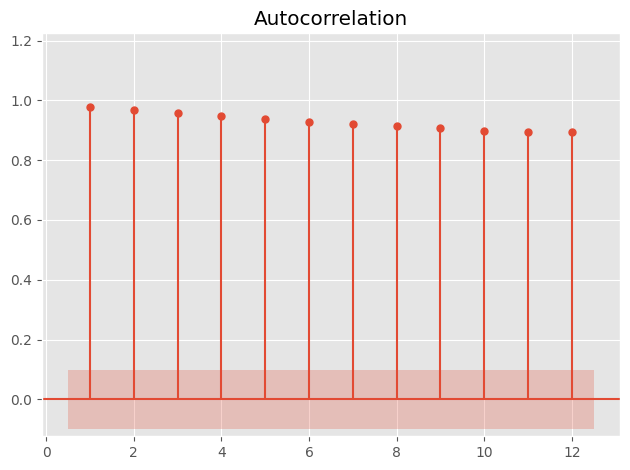

In [23]:
fig = plt.figure()
ax = fig.gca()

plot_acf(resid, ax, lags=12, zero=False, auto_ylims=True, bartlett_confint=False)

plt.tight_layout()
plt.show()

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [58]:
aus_production = pd.read_csv("fpppy_data/data/aus_production.csv")
aus_production.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


In [59]:
aus_bricks_prod = aus_production.filter(["ds", "Bricks"]).rename({"Bricks": "y"}, axis=1)
aus_bricks_prod["ds"] = pd.to_datetime(aus_bricks_prod["ds"])
aus_bricks_prod = aus_bricks_prod.sort_values(["ds"]).reset_index(drop=True)
aus_bricks_prod.head()

,ds,y
0,1956-01-01,189.0
1,1956-04-01,204.0
2,1956-07-01,208.0
3,1956-10-01,197.0
4,1957-01-01,187.0


In [60]:
aus_bricks_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      218 non-null    datetime64[ns]
 1   y       198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [61]:
aus_bricks_prod = aus_bricks_prod.fillna(np.mean(aus_bricks_prod["y"]))

In [72]:
stl = STL(aus_bricks_prod["y"], period=4, robust=False)
res = stl.fit()

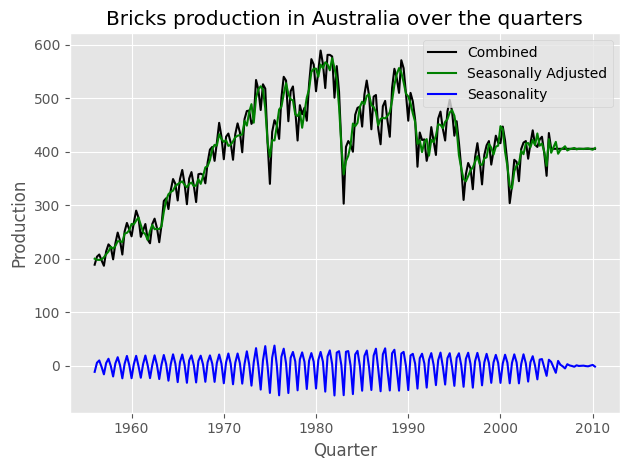

In [73]:
sadj = aus_bricks_prod["y"]-res.seasonal

fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod["ds"], aus_bricks_prod["y"], c="k", label="Combined")
ax.plot(aus_bricks_prod["ds"], sadj, c="g", label="Seasonally Adjusted")
ax.plot(aus_bricks_prod["ds"], res.seasonal, c="b", label="Seasonality")

ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.set_title("Bricks production in Australia over the quarters")
ax.legend()

plt.tight_layout()
plt.show()

In [75]:
res.resid

0      3.441710
1     -0.276030
2     -2.394875
3     -3.417621
4     -1.855951
         ...   
213    0.364538
214    0.903855
215   -0.392586
216   -1.787169
217    1.304670
Name: resid, Length: 218, dtype: float64

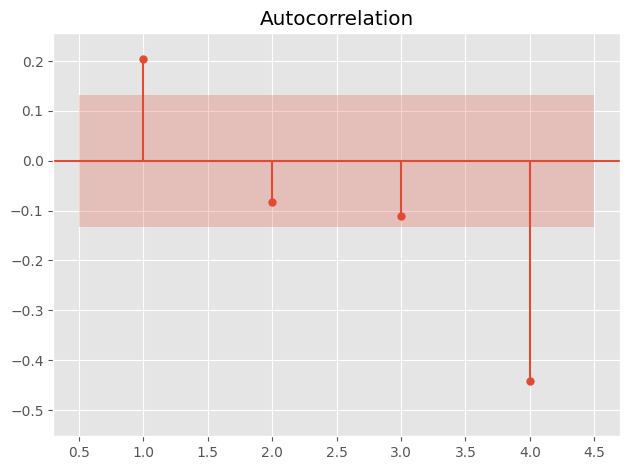

In [77]:
fig = plt.figure()
ax = fig.gca()

plot_acf(res.resid.dropna(), ax=ax, lags=4, zero=False, auto_ylims=True, bartlett_confint=False)

plt.tight_layout()
plt.show()

In [78]:
rstl = STL(aus_bricks_prod["y"], period=4, robust=True)
rres = rstl.fit()

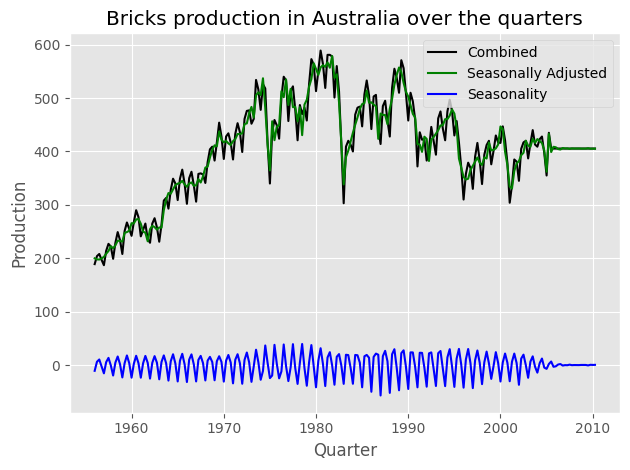

In [81]:
rsadj = aus_bricks_prod["y"]-rres.seasonal

fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod["ds"], aus_bricks_prod["y"], c="k", label="Combined")
ax.plot(aus_bricks_prod["ds"], rsadj, c="g", label="Seasonally Adjusted")
ax.plot(aus_bricks_prod["ds"], rres.seasonal, c="b", label="Seasonality")

ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.set_title("Bricks production in Australia over the quarters")
ax.legend()

plt.tight_layout()
plt.show()

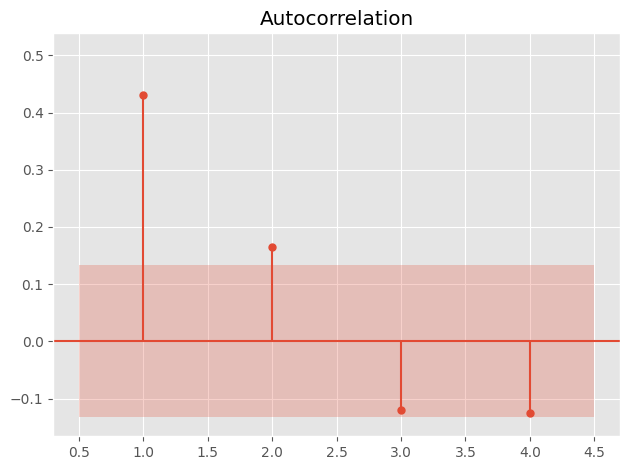

In [82]:
fig = plt.figure()
ax = fig.gca()

plot_acf(rres.resid.dropna(), ax=ax, lags=4, zero=False, auto_ylims=True, bartlett_confint=False)

plt.tight_layout()
plt.show()

In [159]:
import numpy as np
import pandas as pd

In [160]:
aus_tourism = pd.read_csv("fpppy_data/data/tourism.csv")
aus_tourism.head()

,ds,Region,State,Purpose,y
0,1998-01-01,Adelaide,South Australia,Business,135.077690
1,1998-04-01,Adelaide,South Australia,Business,109.987316
2,1998-07-01,Adelaide,South Australia,Business,166.034687
3,1998-10-01,Adelaide,South Australia,Business,127.160464
4,1999-01-01,Adelaide,South Australia,Business,137.448533


In [164]:
gc_tourism = aus_tourism.query("`Region` == 'Gold Coast'").groupby(["Purpose", "ds"], as_index=False).agg("sum")
gc_tourism.head()

,Purpose,ds,Region,State,y
0,Business,1998-01-01,Gold Coast,Queensland,65.541346
1,Business,1998-04-01,Gold Coast,Queensland,70.773399
2,Business,1998-07-01,Gold Coast,Queensland,110.355553
3,Business,1998-10-01,Gold Coast,Queensland,111.322449
4,Business,1999-01-01,Gold Coast,Queensland,98.013389


In [162]:
gc_tourism["ds"] = pd.to_datetime(gc_tourism["ds"])

KeyError: 'ds'

In [ ]:
gc_train_1 = gc_tourism.query("ds.dt.year < 2017")
gc_train_1.head()

,ds,Region,State,Purpose,y
0,1998-01-01,Adelaide,South Australia,Business,135.077690
1,1998-04-01,Adelaide,South Australia,Business,109.987316
2,1998-07-01,Adelaide,South Australia,Business,166.034687
3,1998-10-01,Adelaide,South Australia,Business,127.160464
4,1999-01-01,Adelaide,South Australia,Business,137.448533


In [150]:
gc_train_2 = aus_tourism.query("ds.dt.year < 2016")
gc_train_2.head()

,ds,Region,State,Purpose,y
0,1998-01-01,Adelaide,South Australia,Business,135.077690
1,1998-04-01,Adelaide,South Australia,Business,109.987316
2,1998-07-01,Adelaide,South Australia,Business,166.034687
3,1998-10-01,Adelaide,South Australia,Business,127.160464
4,1999-01-01,Adelaide,South Australia,Business,137.448533


In [151]:
gc_train_3 = aus_tourism.query("ds.dt.year < 2015")
gc_train_3.head()

,ds,Region,State,Purpose,y
0,1998-01-01,Adelaide,South Australia,Business,135.077690
1,1998-04-01,Adelaide,South Australia,Business,109.987316
2,1998-07-01,Adelaide,South Australia,Business,166.034687
3,1998-10-01,Adelaide,South Australia,Business,127.160464
4,1999-01-01,Adelaide,South Australia,Business,137.448533


In [152]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [153]:
gc_fc_1 = []
gc_fc_2 = []
gc_fc_3 = []
for h in range(1, 5):
    gc_fc_1.append(seasonal_naive(gc_train_1["y"].values, h, 4))
    gc_fc_2.append(seasonal_naive(gc_train_2["y"].values, h, 4))
    gc_fc_3.append(seasonal_naive(gc_train_3["y"].values, h, 4))

In [154]:
def mape(y, yhat):
    print(y)
    print(yhat)
    print(np.abs(y-yhat))
    return np.sum(np.abs(y-yhat)/y)/y.shape[0]

In [155]:
aus_tourism["ds"].dt.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int32)

In [156]:
print(mape(aus_tourism.query("ds.dt.year == 2017")["y"], gc_fc_1))
print(mape(aus_tourism.query("ds.dt.year == 2016")["y"], gc_fc_2))
print(mape(aus_tourism.query("ds.dt.year == 2015")["y"], gc_fc_3))

76       129.028829
77       173.736394
78       185.302578
79       197.280003
156      215.940344
            ...    
24239      0.000000
24316     46.223014
24317     50.582837
24318     27.766728
24319     46.281578
Name: y, Length: 1216, dtype: float64
[np.float64(30.672150799999997), np.float64(31.672150799999997), np.float64(32.6721508), np.float64(33.6721508)]


ValueError: operands could not be broadcast together with shapes (1216,) (4,) 